In [1]:
# Imports and parameters required for the analysis

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import nltk as nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk import word_tokenize, pos_tag, ne_chunk 
from nltk.corpus import stopwords
import re
from wordcloud import WordCloud

stop_words = set(stopwords.words('english')) 

%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)
plt.style.use('ggplot')

## Data Exploration

In [2]:
# read the csv and store it as a dataframe

reviews = pd.read_csv('reviews2.csv')

In [3]:
# The columns found in the data frame

reviews.columns

Index(['name', 'categories', 'rating', 'coordinates', 'transactions', 'price',
       'is_closed', 'content', 'review_rating', 'date', 'reviewers_name',
       'cool_tag', 'useful_tag', 'funny_tag'],
      dtype='object')

In [4]:
# the data types for each column 

reviews.dtypes

name               object
categories         object
rating            float64
coordinates        object
transactions       object
price              object
is_closed            bool
content            object
review_rating       int64
date               object
reviewers_name     object
cool_tag            int64
useful_tag          int64
funny_tag           int64
dtype: object

In [5]:
# The first ten entries

reviews.head(10)

,name,categories,rating,coordinates,transactions,price,is_closed,content,review_rating,date,reviewers_name,cool_tag,useful_tag,funny_tag
0,HallPass,"[{'alias': 'food_court', 'title': 'Food Court'}]",4.5,"{'latitude': 40.765937, 'longitude': -111.903777}",['restaurant_reservation'],$$,False,"Okay spot, only two dining options while we we...",3,4/17/2021,Monica C.,0,1,0
1,HallPass,"[{'alias': 'food_court', 'title': 'Food Court'}]",4.5,"{'latitude': 40.765937, 'longitude': -111.903777}",['restaurant_reservation'],$$,False,Wonderful location. Beautiful space. Great men...,4,4/10/2021,Mindi A.,2,1,0
2,HallPass,"[{'alias': 'food_court', 'title': 'Food Court'}]",4.5,"{'latitude': 40.765937, 'longitude': -111.903777}",['restaurant_reservation'],$$,False,"If you've never been here, this place is like ...",5,4/3/2021,Nicolas R.,0,0,0
3,HallPass,"[{'alias': 'food_court', 'title': 'Food Court'}]",4.5,"{'latitude': 40.765937, 'longitude': -111.903777}",['restaurant_reservation'],$$,False,It's basically an expensive food court where y...,3,4/3/2021,Richard M.,0,1,0
4,HallPass,"[{'alias': 'food_court', 'title': 'Food Court'}]",4.5,"{'latitude': 40.765937, 'longitude': -111.903777}",['restaurant_reservation'],$$,False,HallPass is the best food court in SLC. Great ...,5,3/27/2021,Peewat C.,0,0,0
5,HallPass,"[{'alias': 'food_court', 'title': 'Food Court'}]",4.5,"{'latitude': 40.765937, 'longitude': -111.903777}",['restaurant_reservation'],$$,False,WHOA! Pricey! We got a chicken sandwich combo ...,3,3/26/2021,Leesah K.,0,1,0
6,HallPass,"[{'alias': 'food_court', 'title': 'Food Court'}]",4.5,"{'latitude': 40.765937, 'longitude': -111.903777}",['restaurant_reservation'],$$,False,Super fun vibes and cool atmosphere in there. ...,4,3/23/2021,Rebekah J.,1,0,0
7,HallPass,"[{'alias': 'food_court', 'title': 'Food Court'}]",4.5,"{'latitude': 40.765937, 'longitude': -111.903777}",['restaurant_reservation'],$$,False,The way the food court is set up was confusing...,5,3/23/2021,Lorenzo P.,0,0,0
8,HallPass,"[{'alias': 'food_court', 'title': 'Food Court'}]",4.5,"{'latitude': 40.765937, 'longitude': -111.903777}",['restaurant_reservation'],$$,False,I have been back to HallPass several times sin...,5,3/23/2021,Gracie S.,0,0,0
9,HallPass,"[{'alias': 'food_court', 'title': 'Food Court'}]",4.5,"{'latitude': 40.765937, 'longitude': -111.903777}",['restaurant_reservation'],$$,False,The lobster rolls are unbeatable. They're a li...,5,3/21/2021,Taylor H.,0,0,0


In [6]:
# The total number of entries and columns for the dataframe

np.shape(reviews)

(4263, 14)

In [7]:
# The count for the number of reviews for each restaurant in the data set

reviews['name'].value_counts()

Arempa's Venezuelan Cuisine           100
All Chay                              100
Red Iguana                            100
Mr. Shabu at Gateway                  100
Ginger Street                         100
Whiskey Street                        100
Pretty Bird                           100
HSL                                   100
Purgatory                             100
Bodega + The Rest                     100
Eva                                   100
White Horse                           100
Sweet Lake Biscuits & Limeade         100
Lake Effect                           100
Diversion A Social Eatery             100
Caffé Molise                          100
VENETO Ristorante Italiano            100
Nomad Eatery                          100
London Belle                          100
The Copper Onion                      100
Oquirrh                               100
Chile-Tepin                           100
Lucky 13                              100
Ramen Bar                         

In [8]:
# total number of restaurants in the data set

len(reviews['name'].value_counts())

50

In [9]:
# Basic statistics for the number of reviews for restaurants

reviews['name'].value_counts().describe()

count     50.000000
mean      85.260000
std       27.540553
min        4.000000
25%       82.000000
50%      100.000000
75%      100.000000
max      100.000000
Name: name, dtype: float64

*Summary of Data Frame:* The data consisting of 4263 entries with 14 columns for 50 restaurants in Salt Lake CIty. Some of the information for each entry includes: name, category of food offered, reviews, and review ratings. Each restaurant has an average of 85 reviews. 

# Food Categories of Restaurants

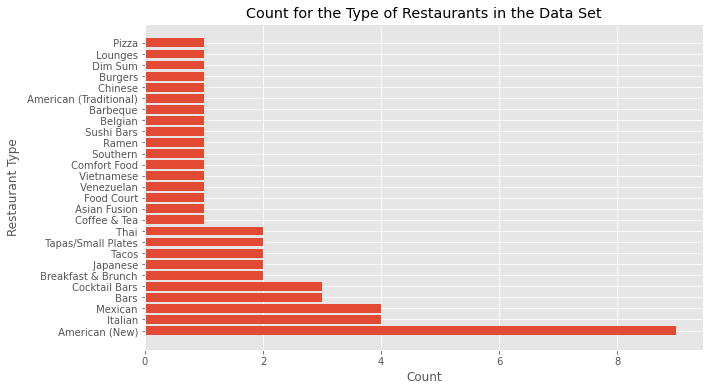

In [10]:
# Select the first row of information for each restaurant

food_types = reviews.drop_duplicates(subset='name')['categories']

# Extract the type of restaurant

food_types = food_types.str.extract(pat = "title':(.*?)}")

#replace of "'" with ""

food_types[0] = food_types[0].str.replace("'", "")

# Value count for the types of restaurants

bar = food_types[0].value_counts()

# Plot the value counts

plt.figure()
plt.title('Count for the Type of Restaurants in the Data Set')
plt.barh(bar.index, bar)
plt.xlabel('Count')
plt.ylabel('Restaurant Type');

In [11]:
bar

 American (New)            9
 Italian                   4
 Mexican                   4
 Bars                      3
 Cocktail Bars             3
 Breakfast & Brunch        2
 Japanese                  2
 Tacos                     2
 Tapas/Small Plates        2
 Thai                      2
 Coffee & Tea              1
 Asian Fusion              1
 Food Court                1
 Venezuelan                1
 Vietnamese                1
 Comfort Food              1
 Southern                  1
 Ramen                     1
 Sushi Bars                1
 Belgian                   1
 Barbeque                  1
 American (Traditional)    1
 Chinese                   1
 Burgers                   1
 Dim Sum                   1
 Lounges                   1
 Pizza                     1
Name: 0, dtype: int64

*Summary of Food categories:* The bar graph and value counts shows that the majority of the restaurants in the data set are categorized into American (New). The next top four categories are Mexican, Italian, Cocktail Bars, and Bars with respective counts of 4, 4, 3, and 3.  

# Restaurant Average Ratings

In [12]:
# Groupby name and review_rating and calculate the mean for each restaurant

means = reviews.groupby('name')['review_rating'].mean()

In [13]:
# Basic statistics for the aggregation. 

means.describe()

count    50.000000
mean      4.351806
std       0.312826
min       3.480000
25%       4.195000
50%       4.401754
75%       4.582500
max       5.000000
Name: review_rating, dtype: float64

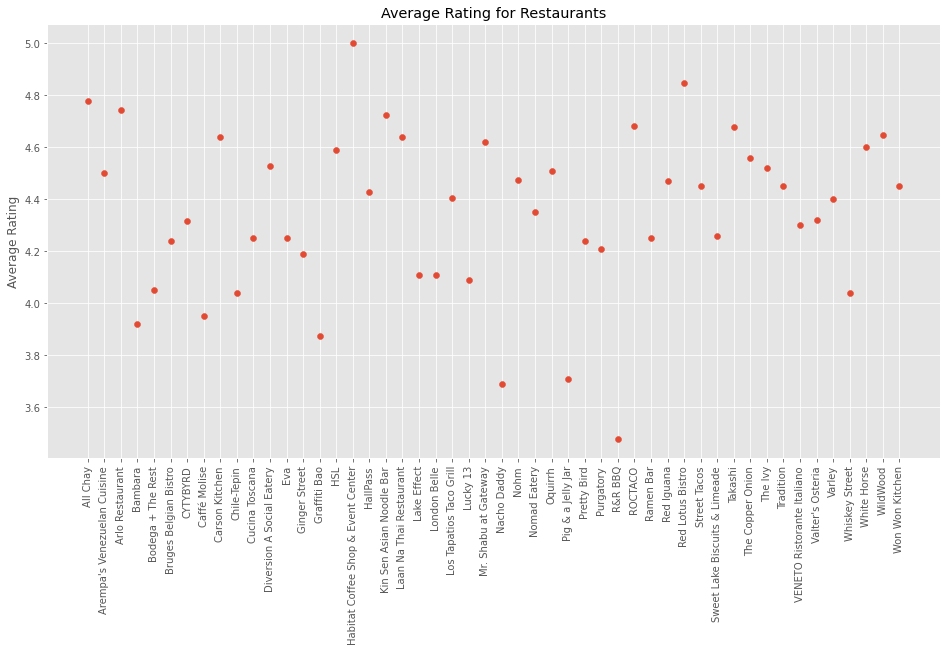

In [14]:
# Scatter plot for the average rating for each restaurant in the data set

plt.figure(figsize=(16, 8))
plt.scatter(means.index, means)
plt.title('Average Rating for Restaurants')
plt.ylabel('Average Rating')
plt.xticks(rotation=90);

In [15]:
# Top five best rated
means.sort_values(ascending=False).head(5)

name
Habitat Coffee Shop & Event Center    5.000000
Red Lotus Bistro                      4.848485
All Chay                              4.780000
Arlo Restaurant                       4.744186
Kin Sen Asian Noodle Bar              4.723684
Name: review_rating, dtype: float64

In [16]:
# five lowest-rated
means.sort_values().head(5)

name
R&R BBQ              3.480
Nacho Daddy          3.690
Pig & a Jelly Jar    3.710
Graffiti Bao         3.875
Bambara              3.920
Name: review_rating, dtype: float64

*Summary of Average Ratings:* The average rating for the restaurants in the data set is 4.35. The scatter plot of the average ratings show that most restaurants fall in the range of 4.0 to 4.8. A couple have average rating greater than 4.8 while while six have average rating less than 4.0. The top-five best rated restaurants in descending order are: Habitat Coffee Shop & Event Center, Red Lotus Bistro, All Chay, Arlo Restaurant, Kin Sen Asian Noodle Bar. The five lowest-rated resturants in descending order are: Bambara, Graffiti Bao, Pig & a Jelly Jar, Nacho Daddy, R&R BBQ. 

# Ratings Pre-pandemic and During Pandemic

In [17]:
# Create a time series for the review_ratings and sort 

date_rating = pd.Series(reviews['review_rating'].values, index=pd.to_datetime(reviews['date']))
date_rating = date_rating.sort_index()

In [18]:
#starting date for reviews

date_rating.index.min()

Timestamp('2015-07-31 00:00:00')

In [19]:
#last date for reviews

date_rating.index.max()

Timestamp('2021-04-21 00:00:00')

In [20]:
# split into pre-pandmeic and pandemic 

pre_pandemic = date_rating['2015-07-31':'2020-03-31']
pandemic = date_rating['2020-04-01':'2021-04-21']

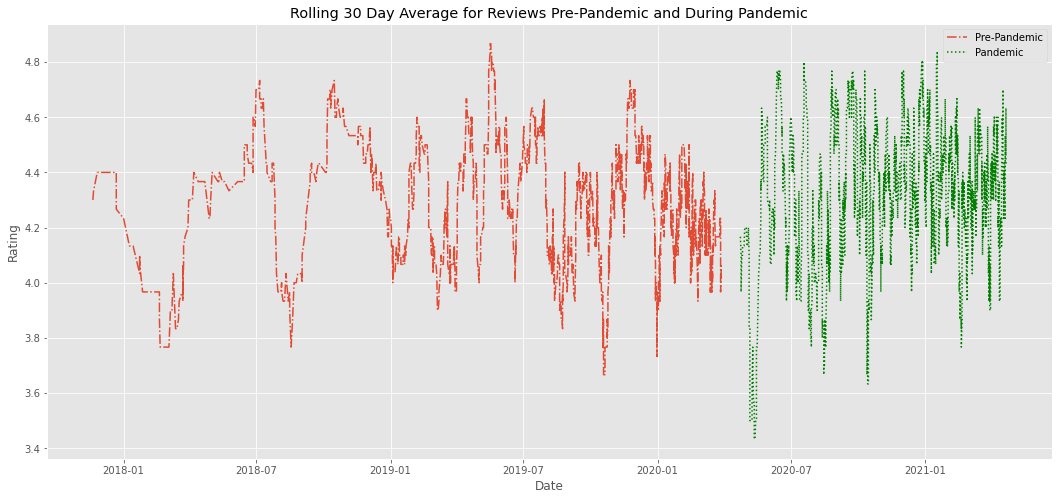

In [21]:
#compute the mean rolling average using a 30 day window and plot

moving_average = pre_pandemic.rolling(window=30).mean()
moving_average2 = pandemic.rolling(window=30).mean()
plt.figure(figsize=(18,8))
plt.title('Rolling 30 Day Average for Reviews Pre-Pandemic and During Pandemic')
plt.xlabel('Date')
plt.ylabel('Rating')
plt.plot(pre_pandemic.index, moving_average, linestyle='dashdot', label='Pre-Pandemic')
plt.plot(pandemic.index, moving_average2, linestyle='dotted', label='Pandemic', color='green')
plt.legend();

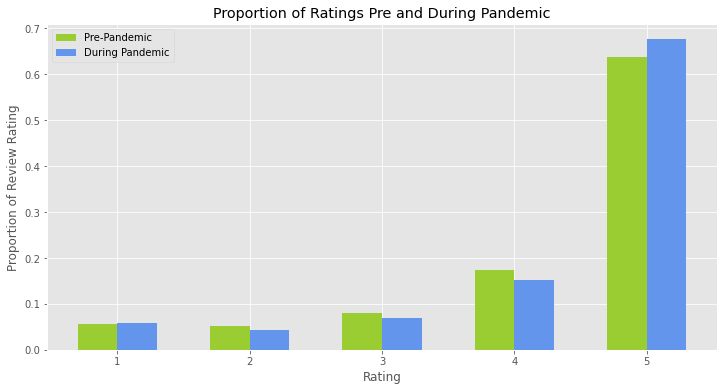

In [22]:
# proportion of reviews for each time frame

first = pre_pandemic.value_counts(normalize=True).sort_index()
second = pandemic.value_counts(normalize=True).sort_index()

# Bar graph plots

w = 0.3
x = np.arange(5)

fig, ax = plt.subplots(figsize=(12,6))

ax.bar(x - w/2, first, w, color='yellowgreen', label='Pre-Pandemic')
ax.bar(x + w/2, second, w, color='cornflowerblue', label='During Pandemic')

ax.set_ylabel('Proportion of Review Rating')
ax.set_xlabel('Rating')
ax.set_title('Proportion of Ratings Pre and During Pandemic')
ax.set_xticks(x)
ax.set_xticklabels(['1', '2', '3', '4', '5'])
ax.legend();

In [23]:
# proportion of ratings pre-pandemic

first

1    0.056916
2    0.052283
3    0.079418
4    0.174057
5    0.637326
dtype: float64

In [24]:
# proportion of ratings during pandemic

second

1    0.058866
2    0.043605
3    0.069767
4    0.151163
5    0.676599
dtype: float64

In [25]:
# pre-pandemic average rating

pre_pandemic.mean()

4.28259430840503

In [26]:
# pandemic average rating

pandemic.mean()

4.343023255813954

*Summary of Ratings Pre and During the Pandemic:* The line graph shows that the time range for pre-pandemic reviews covers about two years. For pandemic reviews, the time range is just over a year. It also demonstrates that reviews ratings have not changed significantly from one time range into the other. A calculation of the means shows that there has been a slight increase in the positivity of review ratings from 4.28 pre-pandemic to 4.34 during the pandemic. The  bar charts of proportion of ratings for the two different ranges show that the proportion of ratings for values 5 and 1 have increased during the pandemic while the proportions of values 2, 3, and 4 have decreased. 

# Dining Options Offered by Restaurants

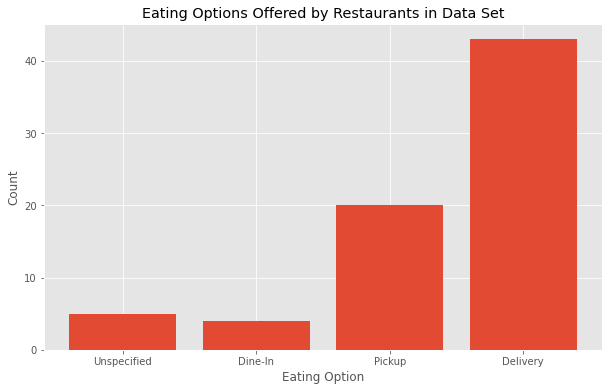

In [27]:
#Select first entry for each restaurant and select 'transaction' column
revs = reviews.drop_duplicates(subset='name')['transactions']

#Initialize variables and count options offered by restaurants in the set
dine_in = 0
delivery = 0
pickup = 0
unspecified = 0
for entry in revs:
    dine_in += entry.count('restaurant_reservation')
    delivery += entry.count('delivery')
    pickup += entry.count('pickup')
    unspecified += entry.count('[]')
    
# Counts and labels in lists
eating_options_counts = [unspecified, dine_in, pickup, delivery]
eating_label = ['Unspecified', 'Dine-In', 'Pickup', 'Delivery']

# Plot the counts
plt.figure()
plt.title("Eating Options Offered by Restaurants in Data Set")
plt.xlabel('Eating Option')
plt.ylabel('Count')
plt.bar(eating_label, eating_options_counts);

In [28]:
print('Total Restaurants Offering Delivery:', delivery)
print('Total Retaurants Offering Pick-Up:', pickup)
print('Total Retaurants Offering Dine-in:',dine_in)
print('Total Retaurants Where Dining Otptions are Unspecified:', unspecified)

Total Restaurants Offering Delivery: 43
Total Retaurants Offering Pick-Up: 20
Total Retaurants Offering Dine-in: 4
Total Retaurants Where Dining Otptions are Unspecified: 5


*Summary of Dining Options:* It seems as though businesses have adapted during the pandemic by providing a lot more delivery and pick up services. A total of 43 are offering delivery options and a total of 20 are offering pick-up.

## Sentiment analysis and data processing

In [29]:
#### find reviews that have covid terms
def has_covid_term(content):
    covid_terms = ['covid','virus','corona','rona','pandemic','covid-19', 'covid 19']
    has_term = False
    for term in covid_terms:
        if term in content.lower():
            has_term = True
    return has_term

#find reviews that have social distancing terms
def has_distancing_term(content):
    covid_terms = ['6 feet','six feet','6 ft','social distance','social distancing','social distanc','6ft','socially distanc', 'safe six']
    has_term = False
    for term in covid_terms:
        if term in content.lower():
            has_term = True
    return has_term

#find reviews that have PPE terms
def has_ppe_term(content):
    covid_terms = ['mask','sanitize','glove','soap','shield', 'N95', 'wash hands']
    has_term = False
    for term in covid_terms:
        if term in content.lower():
            has_term = True
    return has_term

#Sentiment analysis of reviews, finding positive, negative, and intensity of review
sid = SentimentIntensityAnalyzer() #Trained algorithm that will give sentiment, using VADER lexicon
def get_positive_sentiment(content):
    sentiment_score = sid.polarity_scores(clean_content(content))
    return sentiment_score['pos']

def get_negative_sentiment(content):
    sentiment_score = sid.polarity_scores(clean_content(content))
    return sentiment_score['neg']

def get_intensity_sentiment(content):
    sentiment_score = sid.polarity_scores(clean_content(content))
    return sentiment_score['compound']

#lowercasing and removing stop words per review 
## this keeps all the words in the review together rather than creating an entire corpus
def clean_content(content):
    lower_content = content.lower().split()
    filtered_content = []
    for item in lower_content:
        if item not in stop_words:
            filtered_content.append(item)
    sentence = ' '.join(filtered_content)
    return sentence

#adding columns to reviews.csv dataframe
reviews['has_covid_term'] = reviews['content'].apply(has_covid_term)
reviews['has_distancing_term'] = reviews['content'].apply(has_distancing_term)
reviews['has_ppe_term'] = reviews['content'].apply(has_ppe_term)

reviews['positive_sentiment'] = reviews['content'].apply(get_positive_sentiment)
reviews['negative_sentiment'] = reviews['content'].apply(get_negative_sentiment)
reviews['intensity_sentiment'] = reviews['content'].apply(get_intensity_sentiment)

**Compound sentiment score:**
<br >The compound score, or the intensity score is a combination of positive and negative scores, the closer the score is to 1 the more positive the sentiment is.  The further away from 1 the score is, the less positive the sentiment is. We will plot the compound sentiment score to analyze our Yelp data.

In [30]:
#converting the date to datetime
import datetime
reviews['date'] = pd.to_datetime(reviews['date'])

(17987.0, 18748.0)

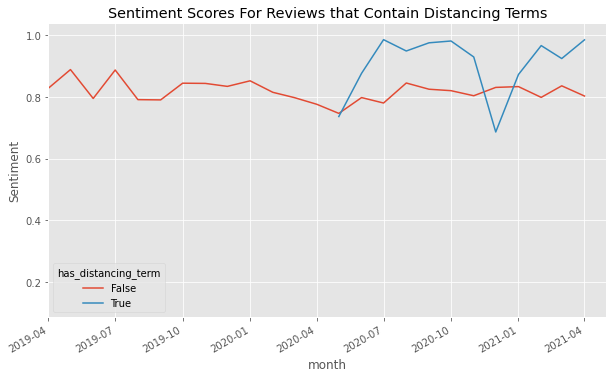

In [31]:
reviews['month'] = reviews['date'].apply(lambda x: x.replace(day=1))
reviews.groupby(['month','has_distancing_term'])['intensity_sentiment']\
    .mean()\
    .unstack()\
    .plot()
plt.ylabel('Sentiment')
plt.title('Sentiment Scores For Reviews that Contain Distancing Terms')
plt.xlim([datetime.date(2019, 4, 1), datetime.date(2021, 5, 1)])

**Analysis of sentiment for reviews that contain distancing terms:**
- Anything that is True means that the review contains key words associated with distancing (ie... '6 feet', 'six feet', '6 ft', 'social distance', 'social distancing', etc.)
- We can see that in our dataset, reviews that have distancing terms don't really show up until after March of 2020, these distance-related reviews seem to have a higher sentiment than the usual reviews without distancing, except for around December, where there is a sharp dip in distancing related-reviews.

(17987.0, 18748.0)

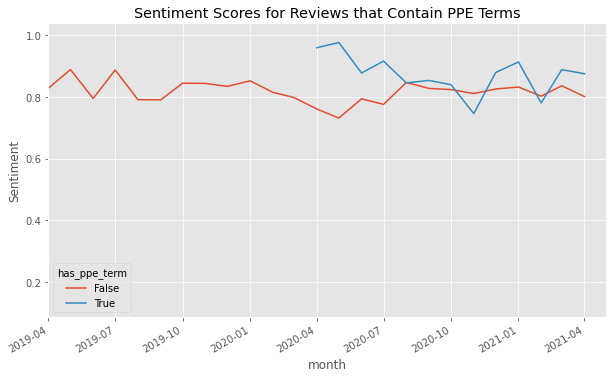

In [32]:
reviews['month'] = reviews['date'].apply(lambda x: x.replace(day=1))
reviews.groupby(['month','has_ppe_term'])['intensity_sentiment']\
    .mean()\
    .unstack()\
    .plot()
plt.ylabel('Sentiment')
plt.title('Sentiment Scores for Reviews that Contain PPE Terms')
plt.xlim([datetime.date(2019, 4, 1), datetime.date(2021, 5, 1)])

**Analysis of sentiment for reviews that contain PPE terms:**
- Anything that is True means that the review contains key words associated with PPE (ie... 'wash hands', 'mask', 'sanitizer', 'glove', 'soap', 'shield', etc.)
- We can see that in our dataset, reviews contain key words associated with PPE are relatively positive throughout the year and the sentiment seems to follow reviews without PPE terms.

(17987.0, 18748.0)

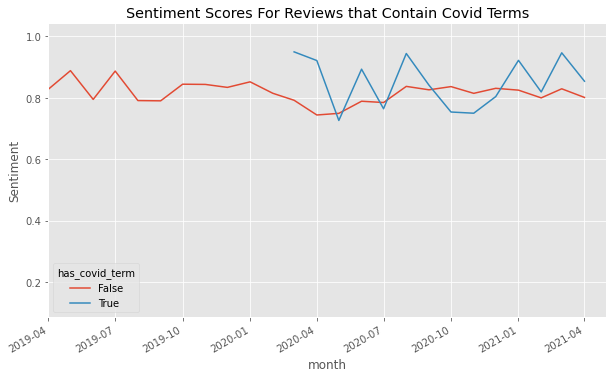

In [33]:
reviews['month'] = reviews['date'].apply(lambda x: x.replace(day=1))
reviews.groupby(['month','has_covid_term'])['intensity_sentiment']\
    .mean()\
    .unstack()\
    .plot()
plt.ylabel('Sentiment')
plt.title('Sentiment Scores For Reviews that Contain Covid Terms')
plt.xlim([datetime.date(2019, 4, 1), datetime.date(2021, 5, 1)])

**Analysis of sentiment for reviews that contain Covid terms:**
- Anything that is True means that the review contains key words associated with covid (ie... 'covid', 'virus', 'corona', 'rona', 'pandemic', 'covid-19', etc.)
- We can see that in our dataset, reviews that have covid terms don't really begin until March of 2020.  The covid reviews seem to have an overall positive sentiment overall, but have little dips at times when compared to terms without covid.

## N-grams

In [34]:
#creating a dataframe of only reviews that mention the pandemic
covid_reviews = reviews[(reviews['has_covid_term'] == 1) | (reviews['has_ppe_term'] == 1) | 
                        (reviews['has_distancing_term'] == 1)]
#covid_reviews

In [35]:
#using n-grams to find the frequent words in the reviews that mention the pandemic
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer(stop_words=stop_words, ngram_range=(2,2))
bigrams = vect.fit_transform(covid_reviews['content'])
bigram_df = pd.DataFrame(bigrams.toarray(), columns=vect.get_feature_names())
bigram_frequency = pd.DataFrame(bigram_df.sum(axis=0)).reset_index()
bigram_frequency.columns = ['bigram', 'frequency']
bigram_frequency = bigram_frequency.sort_values(by='frequency', ascending=False).head(20)
bigram_frequency

,bigram,frequency
16764,salt lake,47
4200,covid 19,40
18188,social distancing,38
10436,lake city,27
5684,due covid,27
3739,come back,24
21924,wearing masks,24
9435,highly recommend,22
8409,go back,21
15718,really good,21


*Summary of bigrams:* Using N-grams is good for capturing better context, we can consider pairs or triples of words that are next to each other in the Yelp reviews. In the example above, we grabbed reviews that had pandemic-related terms; using bigrams, we can see words like 'covid-19', 'hand sanitizer' and 'social distancing' come up in those reviews often.

In [36]:
#using n-grams to find the frequent words in the reviews that mention the pandemic
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer(stop_words=stop_words, ngram_range=(3,3))
trigrams = vect.fit_transform(covid_reviews['content'])
trigrams_df = pd.DataFrame(trigrams.toarray(), columns=vect.get_feature_names())
trigrams_frequency = pd.DataFrame(trigrams_df.sum(axis=0)).reset_index()
trigrams_frequency.columns = ['trigrams', 'frequency']
trigrams_frequency = trigrams_frequency.sort_values(by='frequency', ascending=False).head(20)
trigrams_frequency

,trigrams,frequency
19073,salt lake city,27
21245,staff wearing masks,9
25460,would come back,7
6405,due covid 19,7
25466,would definitely recommend,6
17231,pre fixed menu,6
22140,tables socially distanced,6
24414,wait come back,5
21251,staff wore masks,5
18506,restaurants salt lake,4


*Summary of trigrams:* In the case of using triples, we can see common phrases like, 'staff wearing masks', 'due covid 19', 'take covid seriously', and 'tables socially distanced'

## Reviews that mention 'covid' or 'mask'

In [38]:
#find reviews that have social distancing terms
reviews['covid_frequency'] = reviews['content'].apply(lambda content: 1 if 'covid' in content.lower() else 0)
reviews['mask_frequency'] = reviews['content'].apply(lambda content: 1 if 'mask' in content.lower() else 0)

<BarContainer object of 5 artists>

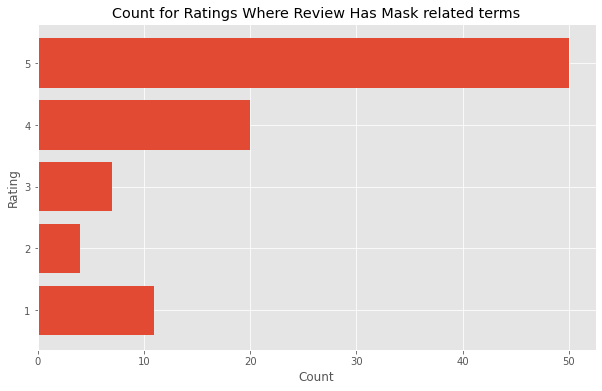

In [39]:
# Select rows with 'mask' term is 1 or True

mask_bar = reviews[reviews['mask_frequency'] == 1]

# Rating Counts

mask_bar = mask_bar['review_rating'].value_counts()
mask_bar

# Plot of counts

plt.figure()
plt.title("Count for Ratings Where Review Has Mask related terms")
plt.xlabel('Count')
plt.ylabel('Rating')
plt.barh(mask_bar.index, mask_bar)

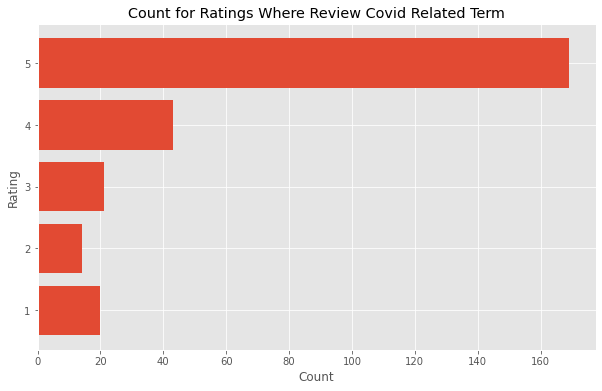

In [40]:
# Select reviews that have term 'covid'

covid_bar = reviews[reviews['covid_frequency'] == 1]

# Rating Counts

covid_bar = covid_bar['review_rating'].value_counts()
# Plot of counts

plt.figure()
plt.title("Count for Ratings Where Review Covid Related Term")
plt.xlabel('Count')
plt.ylabel('Rating')
plt.barh(covid_bar.index, covid_bar);

*Summary of covid and mask review counts:* Reviews that contain key words 'mask' and 'covid' were filtered out and counted.  As we can see in this graph, reviews that mentioned 'covid' or 'mask' were usually rated highly.

In [41]:
#find reviews that have social distancing terms
reviews['covid_frequency'] = reviews['content'].apply(lambda content: 1 if 'covid' in content.lower() else 0)
reviews['mask_frequency'] = reviews['content'].apply(lambda content: 1 if 'mask' in content.lower() else 0)

In [42]:
#filtering reviews for certain parameters
covid_reviews = reviews[(reviews['covid_frequency']==1) & (reviews['review_rating'] <= 1)] #find reviews that talk about covid with a rating of <= 2
mask_reviews = reviews[(reviews['mask_frequency']==1) & (reviews['review_rating'] <= 1)] #find reviews that talk about masks with a rating of <= 2
covid_reviews_pos = reviews[(reviews['covid_frequency']==1) & (reviews['review_rating'] == 5)] #find reviews that talk about covid with a rating of 5
mask_reviews_pos = reviews[(reviews['mask_frequency']==1) & (reviews['review_rating'] == 5)] #find reviews that talk about masks with a rating of 5

#generateing wordcloud
def generate_wordcloud(df, filename):
    #putting all reviews into a list of strings
    covid_list = df['content'].tolist()

    cleaned_covid_list = ''
    for item in covid_list:
        if str(item) != 'nan':
            cleaned_covid_list += ' ' + str(item).lower()

    # Display the generated image:
    # the matplotlib way:
    import matplotlib.pyplot as plt
    # lower max_font_size
    wordcloud = WordCloud(width=1000, height=600, collocation_threshold = True).generate(cleaned_covid_list)
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()
    wordcloud.to_file(filename)


wordcloud with words that are related to negative covid reviews:

negative covid review wordcloud:


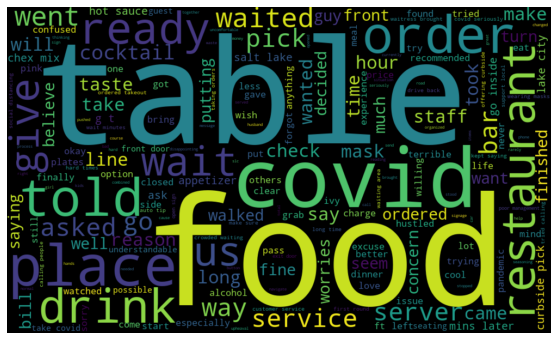


positive covid review wordcloud:


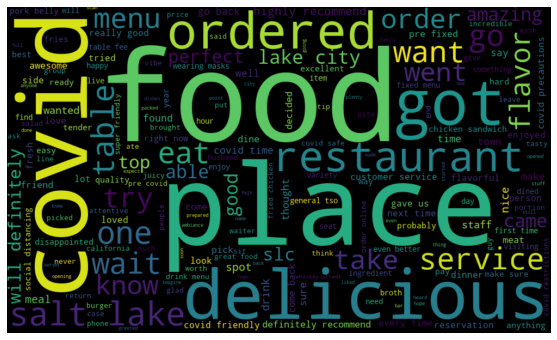

In [43]:
#creating a wordcloud for reviews with key word 'covid' and are rated negative

print('\nwordcloud with words that are related to negative covid reviews:')
print('\nnegative covid review wordcloud:') 
generate_wordcloud(covid_reviews, 'negative_covid_reviews.png') #these words are related to negative covid reviews 

#creating a wordcloud for reviews wiht key word 'covid' and are rated positive
print('\npositive covid review wordcloud:') 
generate_wordcloud(covid_reviews_pos, 'positive_covid_reviews.png')

**Wordcloud summary of negative and positive reviews that mention covid:** <br>
- When filtering Yelp filtering reviews with the key word "covid" and a review of 1, we can see people were frequently unhappy about things like 'social distancing', 'crowded waiting', and taking 'covid seriously'.

- Alternatively, when filtering Yelp reviews with the key word "covid" & a review of 5 we can see common words such as: 'covid precautions', 'covid restrictions', 'wearing masks', 'covid safe', and 'covid friendly'.


wordcloud with words that are related to negative mask reviews:

negative mask review wordcloud:


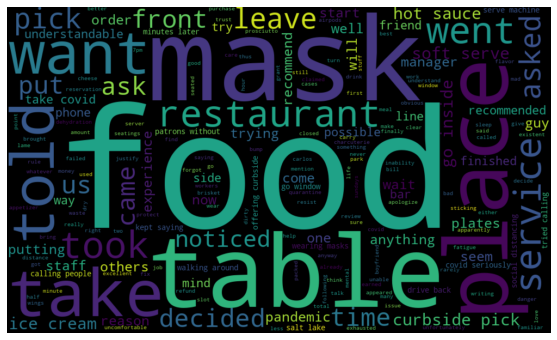


positive mask review wordcloud:


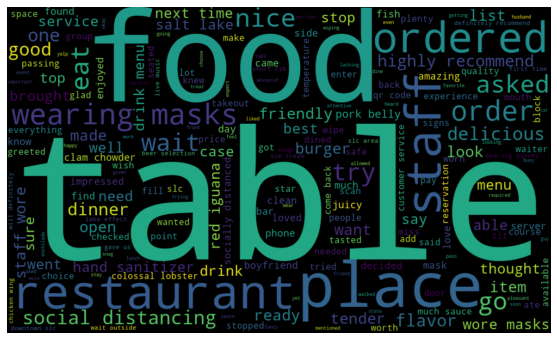

In [44]:
#creating a wordcloud for reviews with key word 'covid' and are rated negative
print('\nwordcloud with words that are related to negative mask reviews:')
print('\nnegative mask review wordcloud:')
generate_wordcloud(mask_reviews, 'negative_mask_reviews.png') #these words are related to negative mask reviews
print('\npositive mask review wordcloud:')
generate_wordcloud(mask_reviews_pos, 'positive_mask_reviews.png')


**Wordcloud summary of negative and positive reviews that mention mask:** <br>
- When filtering Yelp reviews with the key word "mask" & a review of 1 we can see common words such as: 'patrons without', 'curbside pick' and 'closed', but most of the words were related to service.

- Alternatively, when filtering Yelp reviews with the key word "mask" & a review of 5 we can see common words such as: socially distanced, hand sanitizer, wearing masks, qr code, wearing gloves, and wore masks, and safe.

## Conclusion

Our scraper was programmed to scrape up to 10 pages of reviews per restaurant if possible, for all 50 restaurants that were picked by the YelpAPI.  The data consisted of 4263 entrieis with 14 columns for 50 restaurants in Salt Lake City.  Some of the important data we extracted were restaurant name, overall rating, reviews and the reviewer rating. 

During our data exploration we discovered that the majority of the restaurants in this dataset are categorized as American (New), with Mexican, Italian, Cocktail Bars, and Bars leading after.  On average, we can see that overall restaurant ratings in this data set is 4.35, with most restaurants falling within the 4.0-4.8 range. 

From our analysis, review ratings have not changed significantly from one time range to the other -- when calculating the means of the ratings over a period of time, we discovered that there has been a slight increase in the positvity of review ratings from 4.28 pre-pandemic to 4.34 during the pandemic. We also discovered that the proportion of ratings for values 5 and 1 have increased during the pandemic, while the proportions of values 2, 3, and 4 have decreased. We've also analyzed that businesses have adapted during the pandemic by providing a lot more delivery and pick-up services -- a total of 43 are offering delivery options and a total of 20 are offering pick up. 

In our project, we decided to use sentiment analysis to understand the opinions of people on the subject.  We used VADER which analyzes all of our reviews and then provides us a score of positive, negative, and compound.  In our dataset we decided to use the compound score -- a combination of positive and negative scores that range from -1 to 1; anything trending towards -1 would be considered negative, and anything trending towards 1 would be considered positive. In our dataset, we found that on average, sentiment scores for social-distancing terms had a slightly higher sentiment than reviews that did not have social-distancing terms. We also discovered that reviews with PPE terms (mask, sanitizer, glove, etc.) were relatively positive throughout the year and followed closely in trend with reviews that didn't contain PPE terms.  For reviews with covid terms, we had an overall positive sentiment, with a lot of sharp peaks towards highly positive sentiment (\~0.9) and a slight dip downwards (\~0.7) during October - November of 2020. 

We also used N-grams and WordCloud to find frequently used words in reviews that contained pandemic related terms. We found that highly rated reviews that mentioned covid or masks had common words such as, 'socially distanced, hand sanitizer, wearing masks, qr code, wore masks, covid safe, and covid friendly.'  Alternatively, we found that negatively rated reviews that mentioned covid or masks had common words such as, 'patrons without (mask)', 'closed', 'covid seriously', 'social distancing', and 'crowded waiting'

Overall, it seems as though restaurants have been doing fairly well adapting to the pandemic and following safety guidelines as their reviews have been mostly positive from customers. 

## What we would do differently next time: Limitations and Ethics

Initially when we planned this project, we did not know that the YelpAPI only allowed 3 reviews per restaurant.  This was a big limitation, but also an ethical concern as it costs Yelp money and technically does not follow the terms of service if we were to scrape more than 3 reviews per restaurant.

To figure out a way around this limitation, we used a 3rd party API we found online called scraperdog.  Scraperdog allows up to 1000 requests, so we were limited to how much data we would be able to grab.  When coding our scraper we had to keep this consideration in mind - everytime we ran the code, X amount of requests would be used.

If we were to do this differently next time, it would've been a better idea to find a 3rd party API that didn't limit us by requests, such as pyppeteer and scraped a lot more reviews. 